# PROJET NLP IMDB

## imports

In [1]:
import nltk
nltk.download('stopwords') 
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/baguidou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/baguidou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
#!pip install wordcloud
#!pip install pyLDAvis

In [3]:
#scrap
import requests
from bs4 import BeautifulSoup

# Data manipulation
import numpy as np
import pandas as pd
pd.options.display.max_colwidth = 100

# Text preprocessing and modelling
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.pipeline import Pipeline

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='talk')

from wordcloud import WordCloud

# Warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# Stopwords
stop_words = set(ENGLISH_STOP_WORDS).union(stopwords.words('english'))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
print(f"Number of stop words: {len(stop_words)}")

Number of stop words: 383


## SCRAP IMDB

In [4]:
def scraping():   
    
    #------------------------------------------------------------------------------------------------------
    #scrap data on url imdb
    #return dataframe
    #------------------------------------------------------------------------------------------------------
    
    liste_synopsis = []
    titres = []
    summary = []

    for i in range(1, 1001, 50):

        #avancement
        print(f"Scrap de la partie {i} sur {i+49}")

        # connect db
        url = f"https://www.imdb.com/search/title/?title_type=feature&num_votes=5000,&sort=user_rating,desc&start={i}&ref_=adv_nxt"
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        soup = soup.find_all(class_='lister-item-content')

        # scrap summary
        summary += [element.find_all("p", class_='text-muted')[-1].text.replace(
            "\n", "").replace("See full summary\xa0»\n')", "") for element in soup]

        # scrap movies href
        liens = [element.find("a")['href'] for element in soup]

        for lien in liens:

            # connect href
            url_2 = f'https://www.imdb.com{lien}?ref_=adv_li_tt'
            response_2 = requests.get(url_2)
            soup_2 = BeautifulSoup(response_2.content, 'html.parser')

            # scrap synopsis
            liste_synopsis.append(soup_2.find(
                class_='inline canwrap').text.replace("\n", "").strip())

            # scrap titles
            titres.append(soup_2.find('h1').text.replace('\xa0', '').split('(')[0])
            
    return pd.DataFrame({'titres': titres, 'synopsis': liste_synopsis, 'resume': summary})


In [5]:
#df = scraping()

In [6]:
#save in csv
#df.to_csv("imdb_1000.csv", index = False)

In [7]:
df = pd.read_csv('imdb_1000.csv')
df

,titres,synopsis,resume
0,Methagu,"Srilankan Government made Sinhala as the only official language in Srilanka, discriminating Tami...",The Movie shows the true events that happened in Tamileelam to suppress Tamil ethnicity and it i...
1,Hababam Sinifi,"Lazy, uneducated students share a very close bond. They live together in the dormitory, where th...","Lazy, uneducated students share a very close bond. They live together in the dormitory, where th..."
2,Les Évadés,Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse...,"Two imprisoned men bond over a number of years, finding solace and eventual redemption through a..."
3,Aynabaji,Ayna is an actor and the prison is his stage. He slips into the characters of the powerful convi...,Ayna is an actor and the prison is his stage. He slips into the characters of the powerful convi...
4,Le Parrain,"The Godfather ""Don"" Vito Corleone is the head of the Corleone mafia family in New York. He is at...",An organized crime dynasty's aging patriarch transfers control of his clandestine empire to his ...
...,...,...,...
995,La Horde sauvage,"It's 1913, and the ""traditional"" American West is dying. Amongst the inhabitants of this dying e...","An aging group of outlaws look for one last big score as the ""traditional"" American West is disa..."
996,On achève bien les chevaux,Gloria is a young woman of the Depression. She has aged beyond her years and feels her life is h...,The lives of a disparate group of contestants intertwine in an inhumanely grueling dance marathon.
997,Ma nuit chez Maud,Thirty-four year old engineer Jean-Louis has just started a new job in Clermont. He leads a rela...,"The rigid principles of a devout Catholic man are challenged during a one-night stay with Maud, ..."
998,Kes,"Bullied at school and ignored and abused at home by his indifferent mother and older brother, Bi...",A working-class English boy spends his free time caring for and training his pet kestrel.


## Delete some keywords

In [8]:
#delete written
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('Written',''))

#delete family
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('family',''))

#delete life
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('life',''))

#delete year
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('year',''))

#delete man
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('man',''))

#delete story
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('story',''))

#delete time
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('time',''))

#delete movie
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('movie',''))

#delete film
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('film',''))

#delete Tamil
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('Tamil',''))

#delete tamil
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('tamil',''))

#delete come
df['synopsis'] = df['synopsis'].apply(lambda x: x.replace('come',''))

## Preprocessing

In [9]:
def preprocess_text(document):
    #------------------------------------------------------------------------------------------------------
    #keep only alpha character group by 3, select somes tag word, remove stop-words, lemmatize words
    #return array of final words 
    #------------------------------------------------------------------------------------------------------
    
    """Preprocess document into normalised tokens."""
    # Tokenise words into alphabetic tokens with minimum length of 3
    tokeniser = RegexpTokenizer(r'[A-Za-z]{3,}')
    tokens = tokeniser.tokenize(document)
    
    # Tag words with POS tag
    #pos_map = {'J': 'a', 'N': 'n', 'R': 'r', 'V': 'v'}
    pos_map = {'N': 'n'}
    
    pos_tags = pos_tag(tokens)
    
    # Lowercase and lemmatise 
    lemmatiser = WordNetLemmatizer()
    lemmas = [lemmatiser.lemmatize(t.lower(), pos=pos_map.get(p[0], 'v')) for t, p in pos_tags]
    
    # Remove stopwords
    keywords= [lemma for lemma in lemmas if lemma not in stop_words]
    return keywords

In [10]:
#split Dataset
X_train, X_test = train_test_split(df, test_size=0.2, 
                                   random_state=1)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (800, 3)
Test size: (200, 3)


In [11]:
# Preprocess text
vectoriser = CountVectorizer(analyzer=preprocess_text)
document_term_matrix = vectoriser.fit_transform(X_train['synopsis'])

# Run grid search across parameters of choice
lda = LatentDirichletAllocation(learning_method='online', random_state=0)
param_grid = {'n_components': [2,4,6]}
lda_search = GridSearchCV(lda, param_grid=param_grid, cv=2)
lda_search.fit(document_term_matrix)

# Inspect grid search output
results = pd.DataFrame(lda_search.cv_results_)\
            .sort_values("rank_test_score")
results[['param_n_components', "rank_test_score", 'mean_test_score', 
         'std_test_score']]

,param_n_components,rank_test_score,mean_test_score,std_test_score
0,2,1,-181586.175235,1395.932035
1,4,2,-193323.365727,2326.381218
2,6,3,-203090.431616,1692.121025


In [12]:
#a = df['synopsis'][:1]
#c = preprocess_text(a)
#b = vectoriser.fit_transform(a)
#count_vect_df = pd.DataFrame(b.todense(), columns=vectoriser.get_feature_names())
#count_vect_df

## Model creation

In [13]:
def describe_topics(lda, feature_names, top_n_words=5, show_weight=False):
    #------------------------------------------------------------------------------------------------------
    #show main words of each topics
    #return none
    #------------------------------------------------------------------------------------------------------
    
    """Print top n words for each topic from lda model."""
    normalised_weights = lda.components_ / lda.components_.sum(axis=1)[:, np.newaxis]
    
    for i, weights in enumerate(normalised_weights):  
        print(f"********** Topic {i+1} **********")
        
        if show_weight:
            feature_weights = [*zip(np.round(weights, 4), feature_names)]
            feature_weights.sort(reverse=True)
            print(feature_weights[:top_n_words], '\n')
        
        else:
            top_words = [feature_names[i] for i in weights.argsort()[:-top_n_words-1:-1]]
            print(top_words, '\n')

### Define number of Contents

In [14]:
#Topics creation fon n_components = n

#**************************************
n_components = 4
#**************************************

pipe = Pipeline([('vectoriser', CountVectorizer(analyzer=preprocess_text, min_df=5)),
                 ('lda', LatentDirichletAllocation(n_components=n_components, topic_word_prior = 0.9, doc_topic_prior = 0.1, learning_method='batch', random_state=0))])
pipe.fit(X_train['synopsis'])
# Inspect topics
feature_names = pipe['vectoriser'].get_feature_names()
describe_topics(pipe['lda'], feature_names, top_n_words=20)

********** Topic 1 **********
['police', 'love', 'crime', 'young', 'murder', 'wife', 'friend', 'force', 'death', 'kill', 'lead', 'make', 'case', 'officer', 'work', 'world', 'help', 'fall', 'brazil', 'byclaudio'] 

********** Topic 2 **********
['war', 'make', 'com', 'world', 'young', 'men', 'try', 'love', 'begin', 'meet', 'live', 'way', 'force', 'send', 'army', 'day', 'return', 'father', 'british', 'child'] 

********** Topic 3 **********
['old', 'live', 'new', 'want', 'father', 'make', 'meet', 'mother', 'town', 'wife', 'small', 'work', 'love', 'young', 'return', 'son', 'day', 'daughter', 'girl', 'try'] 

********** Topic 4 **********
['father', 'son', 'love', 'young', 'friend', 'girl', 'try', 'boy', 'daughter', 'mother', 'world', 'com', 'gang', 'school', 'live', 'know', 'meet', 'home', 'day', 'village'] 



## Transform Train & Viz

In [15]:
pd.options.display.max_colwidth = 50
train = pd.DataFrame(X_train)
columns = ['topic'+str(i+1) for i in range(n_components)]
train[columns] = pipe.transform(X_train['synopsis'])
train.head()

,titres,synopsis,resume,topic1,topic2,topic3,topic4
382,Le crime était presque parfait,"In London, wealthy Margot Mary Wendice had a b...",A former tennis player tries to arrange his wi...,0.995113,0.001629,0.001629,0.001629
994,Patton,"""Patton"" tells the tale of General George S. P...",The World War II phase of the career of contro...,0.003402,0.989794,0.003402,0.003402
982,L'arbre aux sabots,The inside a farm in Italy at the end of the ...,Peasant life in a feudal farm in rural Italy a...,0.002907,0.991277,0.002908,0.002908
47,Kibar Feyzo,A feudal village in Southeastern Turkey in 197...,A feudal village in Southeastern Turkey in 197...,0.002067,0.002067,0.779680,0.216186
521,"Paris, Texas",A wanders out of the desert after a four abs...,"Travis Henderson, an aimless drifter who has b...",0.005748,0.005749,0.005749,0.982755


In [16]:
#Create df with Top 1 to 3
train = train.assign(top1=np.nan, prob1=np.nan, top2=np.nan, 
                     prob2=np.nan, top3=np.nan, prob3=np.nan)

top_liste = [f'top{i}' for i in range(1,n_components+1)]
top_prob = [f'prob{i}' for i in range(1,n_components+1)]
last_topic = f'topic{n_components}'

for record in train.index:
    top = train.loc[record, 'topic1':last_topic].astype(float).nlargest(n_components)
    train.loc[record, top_liste] = top.index
    train.loc[record, top_prob] = top.values
train.drop(['synopsis'], axis=1).head()

,titres,resume,topic1,topic2,topic3,topic4,top1,prob1,top2,prob2,top3,prob3,top4,prob4
382,Le crime était presque parfait,A former tennis player tries to arrange his wi...,0.995113,0.001629,0.001629,0.001629,topic1,0.995113,topic3,0.001629,topic4,0.001629,topic2,0.001629
994,Patton,The World War II phase of the career of contro...,0.003402,0.989794,0.003402,0.003402,topic2,0.989794,topic1,0.003402,topic4,0.003402,topic3,0.003402
982,L'arbre aux sabots,Peasant life in a feudal farm in rural Italy a...,0.002907,0.991277,0.002908,0.002908,topic2,0.991277,topic3,0.002908,topic4,0.002908,topic1,0.002907
47,Kibar Feyzo,A feudal village in Southeastern Turkey in 197...,0.002067,0.002067,0.779680,0.216186,topic3,0.779680,topic4,0.216186,topic1,0.002067,topic2,0.002067
521,"Paris, Texas","Travis Henderson, an aimless drifter who has b...",0.005748,0.005749,0.005749,0.982755,topic4,0.982755,topic2,0.005749,topic3,0.005749,topic1,0.005748


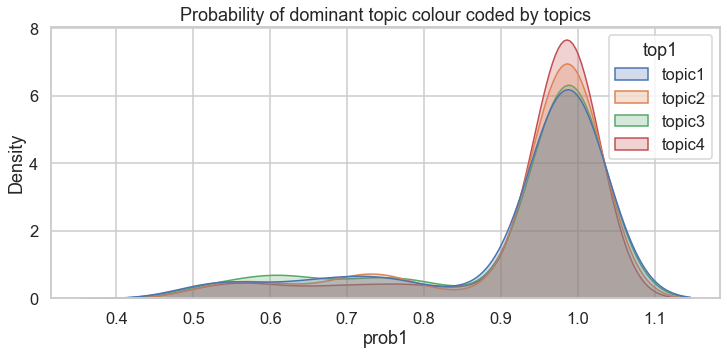

In [17]:
#plot schema
plt.figure(figsize=(12,5))
sns.kdeplot(data=train, x='prob1', hue='top1', shade=True, 
            common_norm=False)
plt.title("Probability of dominant topic colour coded by topics");

In [18]:
df2 = train[['titres','top1']]
df_compare=pd.DataFrame()
df3 = df2.sample(len(df2))

for i in range(1,n_components+1):
    df_compare[f'topic{i}'] = list(df3['titres'][df3['top1'] == f'topic{i}'].head(10))

df_compare

,topic1,topic2,topic3,topic4
0,Le Lion du désert,The Father,Certains l'aiment chaud,Tumbbad
1,Les infiltrés,Le mécano de la Générale,Je veux manger ton pancréas,Baahubali 2: La conclusion
2,Le loup de Wall Street,Le Pont,Procès de singe,Été précoce
3,Du rififi chez les hommes,Nausicaä de la vallée du vent,Le bourreau,Capharnaüm
4,Bizim Için Sampiyon,Les nuits de Cabiria,"Le Parrain, 2ᵉ partie",Do-ga-ni
5,Mr. Smith au sénat,Golmaal,Divorce à l'italienne,Anbe Sivam
6,Balkanski spijun,Un prophète,Udaan,Vuk
7,Seven,Assal Eswed,Jean de Florette,Yol
8,Impitoyable,Le miroir,La source,My Hero Academia: Heroes Rising
9,Les Fils de l'homme,Omkara,Épouses et concubines,Une séparation


In [19]:
def inspect_term_frequency(df, vectoriser, n=30):
    #------------------------------------------------------------------------------------------------------
    #show main words sorted for each topics
    #return none
    #------------------------------------------------------------------------------------------------------
    
    """Show top n frequent terms in corpus."""
    document_term_matrix = vectoriser.transform(df)
    document_term_matrix_df = pd.DataFrame(document_term_matrix.toarray(), 
                                           columns=feature_names)
    term_frequency = pd.DataFrame(document_term_matrix_df.sum(axis=0), 
                                  columns=['frequency'])
    return term_frequency.nlargest(n, 'frequency')

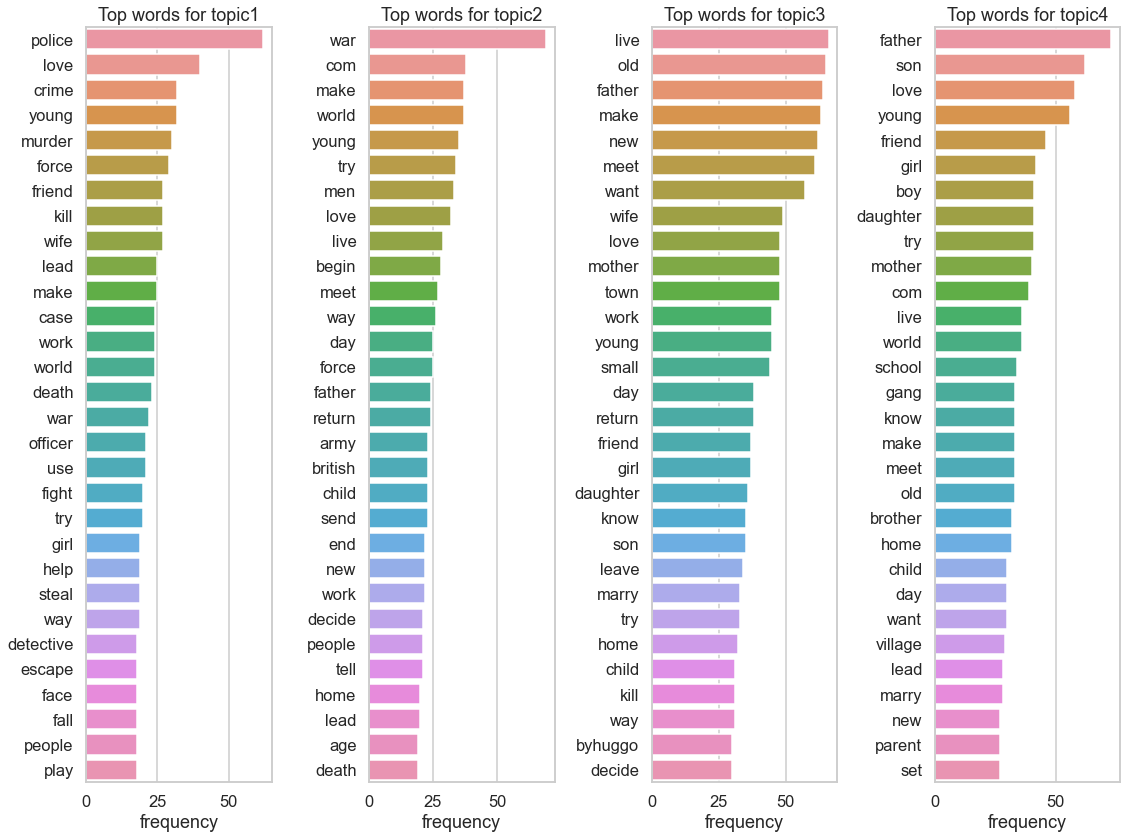

In [20]:
#plot List of Main Words sorted
fig, ax = plt.subplots(1, n_components, figsize=(16,12))
for i in range(n_components):
    topic = 'topic' + str(i+1)
    topic_df = train.loc[train['top1']==topic, 'synopsis']
    freqs = inspect_term_frequency(topic_df, pipe['vectoriser'])
    sns.barplot(data=freqs, x='frequency', y=freqs.index, ax=ax[i])
    ax[i].set_title(f"Top words for {topic}")
plt.tight_layout()

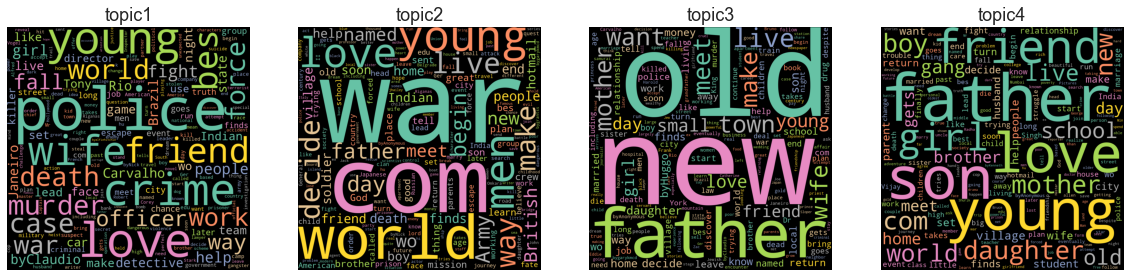

In [21]:
#plot with words
fig, ax = plt.subplots(1, n_components, figsize=(20, 8))
for i in range(n_components):
    topic = 'topic' + str(i+1)
    text = ' '.join(train.loc[train['top1']==topic, 'synopsis'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='Black', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(topic)
    ax[i].axis("off");

## Create name for Topics

In [27]:
topic_mapping = {
    'topic1': "Pierre_one",
    'topic2': "Pierre_three",
    'topic3':"Pierre_two",
    'topic4':"Pierre_four"
    
}
train['topic'] = train['top1'].map(topic_mapping)
train[['synopsis', 'topic']].head()

,synopsis,topic
382,"In London, wealthy Margot Mary Wendice had a b...",Pierre_one
994,"""Patton"" tells the tale of General George S. P...",Pierre_three
982,The inside a farm in Italy at the end of the ...,Pierre_three
47,A feudal village in Southeastern Turkey in 197...,Pierre_two
521,A wanders out of the desert after a four abs...,Pierre_four


In [30]:
def assign_topic(document):
    #------------------------------------------------------------------------------------------------------
    #assign a topic from data send
    #return string with topic name
    #------------------------------------------------------------------------------------------------------
    
    """Assign topic to a document using lda model prediction."""
    probabilities = pipe.transform(document)
    topic = probabilities.argmax()
    topic_name = topic_mapping['topic'+str(topic+1)]
    return topic_name

In [31]:
#Test 3 random training values
for i, document in enumerate(X_train.sample(3).values):
    print(f"********** Test example {i+1} **********", '\n')
    print(f"************************************")
    print(f'titre : {document[0]}')
    print(f"************************************")
    print(document[1], '\n')
    print(f"Assigned topic: {assign_topic(np.atleast_1d(document[1]))}", '\n')

********** Test example 1 ********** 

************************************
titre : Kumbalangi Nights
************************************
The  revolves around four brothers who share a love-hate relationship with each other. Franky's elder brothers, Saji, Bobby and Bony lead a messed up  with their downright arrogance, differences, and disagreements with each other. Each one deals with the struggle of his own. Their relationship progresses to another level when Saji, Boney, and Franky decide to help Bobby stand by his love. Franky's wish for a beautiful home cuddles hope. 

Assigned topic: Pierre_four 

********** Test example 2 ********** 

************************************
titre : Dara iz Jasenovca
************************************
The  is set in the Nazi-occupied Croatian Ustasha regime "NDH" in former Yugoslavia during WWII. The  is told through the experiences of a little girl named Dara who is sent as a child during the Holocaust in the Balkans to the infamous exterminatio

## Predict Test

In [32]:
#Predict Test values
for i, document in enumerate(X_test.values):
    print(f"********** Test example {i+1} **********", '\n')
    print(f"************************************")
    print(f'titre : {document[0]}')
    print(f"************************************")
    print(document[1], '\n')
    print(f"Assigned topic: {assign_topic(np.atleast_1d(document[1]))}", '\n')

********** Test example 1 ********** 

************************************
titre : Andaz Apna Apna
************************************
Amar and Prem are two rivals who belonging to middle-class families with no scope of future advancement. Both individually, without the knowledge of the other decide to take matters into their hands and find ways to get rich quickly. Chaos and acrimony result when both find each other at loggerheads when both arrive to win the hand of the daughter of multi-millionaire Ram Gopal Bajaj amidst considerable upheavals when Shyam, the twin brother of Ram, decides to do away with Ram and assume his identity and thus take over the estate of the Bajaj . bySonia 

Assigned topic: Pierre_four 

********** Test example 2 ********** 

************************************
titre : Tourments
************************************
Francisco is rich, rather strict on principles, and still a bachelor. After meeting Gloria by accident, he is suddenly intent on her becoming

Assigned topic: Pierre_two 

********** Test example 16 ********** 

************************************
titre : Rangasthalam
************************************
The  is set in 1980's rural India. Chittibabu, a pure and innocent guy with partial deafness, earns his livelihood by supplying water to agricultural lands in the fictional village of Rangasthalam. The crux of the  forms when his brother decides to contest against the President who had been ruling the village for 30 s by usurping the lands of the innocent villagers. Chittibabu, on the other hand, is only concerned for his brother's safety and will go to great lengths to safeguard his . byRitchie Sudarshan 

Assigned topic: Pierre_three 

********** Test example 17 ********** 

************************************
titre : Gladiator
************************************
Maximus is a powerful Ro general, loved by the people and the aging Emperor, Marcus Aurelius. Before his death, the Emperor chooses Maximus to be his heir over 

Assigned topic: Pierre_two 

********** Test example 31 ********** 

************************************
titre : Bons baisers de Bruges
************************************
London based hit men Ray and Ken are told by their boss Harry Waters to lie low in Bruges, Belgium for up to two weeks following their latest hit, which resulted in the death of an innocent bystander. Harry will be in touch with further instructions. While they wait for Harry's call, Ken, following Harry's advice, takes in the sights of the medieval city with great appreciation. But the charms of Bruges are lost on the simpler Ray, who is already despondent over the innocent death, especially as it was his first job. Things change for Ray when he meets Chloe, part of a  crew shooting a  starring an American dwarf named Jimmy. When Harry's instructions arrive, Ken, for whom the job is directed, isn't sure if he can carry out the new job, especially as he has gained a new appreciation of  from his stay in the fairyta

Assigned topic: Pierre_two 

********** Test example 47 ********** 

************************************
titre : Network - Main basse sur la TV
************************************
In the 1970s, terrorist violence is the stuff of networks' nightly news programming and the corporate structure of the UBS Television Network is changing. Meanwhile, Howard Beale, the aging UBS news anchor, has lost his once strong ratings share and so the network fires him. Beale reacts in an unexpected way. We then see how this affects the fortunes of Beale, his coworkers (Max Schumacher and Diana Christensen), and the network. byBruce Janson <bruce@cs.su.oz.au> 

Assigned topic: Pierre_one 

********** Test example 48 ********** 

************************************
titre : Drishyam 2
************************************
Six s after the terrible event that almost destroyed his , Georgekutty is the proud owner of a  theater and aspiring to write and produce his own hit . Yet his wife Rani is ill at ease.

Assigned topic: Pierre_four 

********** Test example 62 ********** 

************************************
titre : Toy Story
************************************
A little boy named Andy loves to be in his room, playing with his toys, especially his doll named "Woody". But, what do the toys do when Andy is not with them, they  to . Woody believes that his  (as a toy) is good. However, he must worry about Andy's  moving, and what Woody does not know is about Andy's birthday party. Woody does not realize that Andy's mother gave him an action figure known as Buzz Light, who does not believe that he is a toy, and quickly bes Andy's new favorite toy. Woody, who is now consumed with jealousy, tries to get rid of Buzz. Then, both Woody and Buzz are now lost. They must find a way to get back to Andy before he moves without them, but they will have to pass through a ruthless toy killer, Sid Phillips. byJohn Wiggins 

Assigned topic: Pierre_three 

********** Test example 63 ********** 

********

Assigned topic: Pierre_two 

********** Test example 72 ********** 

************************************
titre : ...et pour quelques dollars de plus
************************************
Drifting from town to town, the poncho-clad Man with No Name and the lightning-fast right hand rides into the town of El Paso, in search of the iacal escaped convict, El Indio. It's been eighteen short months since the deadly confrontation in Pour une poignée de dollars (1964), and this , the solitary stranger, now a professional bounty hunter, will have to go against his beliefs and do the unthinkable: join forces with the hawk-eyed marks, Colonel Douglas Morr, to collect the hefty reward. Now, as El Indio and his cut-throats have already set their sights on robbing the crammed-with-cash Bank of El Paso, the stage is set for a bloody showdown at high noon, against the backdrop of silent double-crosses and fragile allegiances. But, is it worth dicing with death for a few dollars more? byNick Riganas 



Assigned topic: Pierre_three 

********** Test example 83 ********** 

************************************
titre : Frankenstein junior
************************************
A young neurosurgeon (Gene Wilder) inherits the castle of his grandfather, the famous Dr. Victor von Frankenstein. In the castle he finds a funny hunchback called Igor, a pretty lab assistant named Inga and the old housekeeper, frau Blucher -iiiiihhh!-. Young Frankenstein believes that the work of his grandfather is only crap, but when he discovers the book where the mad doctor described his reanimation experiment, he suddenly changes his mind... byFlavio Rizzardi <spillo@maya.dei.unpid.it> 

Assigned topic: Pierre_two 

********** Test example 84 ********** 

************************************
titre : Papillon
************************************
A semi-fictional account of Henri Charrière's  in the penal system in French Guyana - some of it spent on infamous Devil's Island - is presented. It's the early 1930s. C

Assigned topic: Pierre_four 

********** Test example 100 ********** 

************************************
titre : Agent Sai Srinivasa Athreya
************************************
Agent Athreya (Navin Polisetty) starts a detective agency in Nellore (a city) named FBI (Fathima Bureau of Investigation) and covers small cases. The silliness and façade continue until Athreya lands in trouble when he seriously pursues a dead found on the rails. How Athreya untangles the mystery is what the  is all about. byvamsikvk 

Assigned topic: Pierre_two 

********** Test example 101 ********** 

************************************
titre : La chute
************************************
In April of 1945, Gery stands at the brink of defeat with the Soviet Armies closing in from the west and south. In Berlin, capital of the Third Reich, Adolf Hitler proclaims that Gery will still achieve victory and orders his Generals and advisers to fight to the last . "Downfall" explores these final days of the Reich

********** Test example 111 ********** 

************************************
titre : Arabesk
************************************
This is the tragicomic  of two lovers who cannot ever get together. Sener is the son of a simple  in the village and he is in love with the village head's daughter Mujde. Kaya is also in love with Mujde. With Kaya's misleading, Mujde's father is against her marriage with Sener and does everything to prevent it. Sener goes to Istanbul and bes a famous singer, Mujde follows him. Sener gets blind in an accident, and Mujde gets blind as he is cured. Sener gets amnesia, though he marries Mujde and gets healed. One mishap follows the other.. They  together, get separated, and reunite.. The mishaps go on till they get old and die.. They hope to reunite in the  after death, yet there too Kaya is waiting for them.. byomayra73@yahoo.com 

Assigned topic: Pierre_four 

********** Test example 112 ********** 

************************************
titre : Kwaidan
******

Assigned topic: Pierre_two 

********** Test example 125 ********** 

************************************
titre : Who Killed Captain Alex?
************************************
A mafia leader's brother is captured in a shootout, prompting a revenge attack on the army camp. But when troop leader Captain Alex is killed during a raid, a violent war escalates between the two sides. The captain's brother takes matters into his own hands, while mafia henchmen take to the skies to bomb Kampala. Narrated with energy and wit by 'Video Joker' Emmie, ultra-low budget thriller Who Killed Captain Alex became an international viral sensation when its trailer first hit YouTube. Self-taught -maker Nabwana Isaac Godfrey Geoffrey produced, directed, shot, wrote and edited the  from his home in the slums of Uganda (a.k.a 'Wakaliwood') for under $200. byPhoenix Fry 

Assigned topic: Pierre_one 

********** Test example 126 ********** 

************************************
titre : Sin City
****************

Assigned topic: Pierre_four 

********** Test example 142 ********** 

************************************
titre : Grand Prix Pignon-sur-Roc
************************************
100 miles north, a bit east and up, is Flåklypa... home of bicycle repair Reodor Felgen and his two assistants - Solan Gundersen, morning bird and natural born optimist, and Ludvig who is a true pessimist. Sponsored by oil sheik Ben Redic Fy Fazan, they build the car "Il Tempo Gigante" and the race of the decade is a fact. byRonny Arild <ronnya@stud.cs.uit.no> 

Assigned topic: Pierre_four 

********** Test example 143 ********** 

************************************
titre : Munje!
************************************
Urban dy, happening during a night in Belgrade. Mare, Pop and Gojko are three friends who grew up together. Mare and Pop have always been musicians, while Gojko (who was harassed by them in school and nicknamed 'Sissy') became a 'guy in suit', boss of his own club and recording studio. Pop and M

Assigned topic: Pierre_one 

********** Test example 160 ********** 

************************************
titre : Alai Payuthey
************************************
Karthik (Madhavan) is frantic after the disappearance of his wife Shakti (Shalini). Told in flashbacks, the  traces their brief marriage as the couple's dreamy roce runs through the usual gamut of highs and lows. byJoyojeet Pal 

Assigned topic: Pierre_four 

********** Test example 161 ********** 

************************************
titre : Kad porastem bicu Kengur
************************************
The  consists of three parallel stories that are interwoven and played in Vozdovac. In the first , Braca tries to seduce Iris, a model from the city center. Although they try not to be "two worlds" they certainly are. In another , Dule i Somi, in the football match Eastwich - Manchester, they bet on Eastwich because their goalkeeper is a close friend. The third  takes place on the roof of the skyscraper where Avaks and Hyb

Assigned topic: Pierre_two 

********** Test example 181 ********** 

************************************
titre : Pranchiyettan and the Saint
************************************
Chirammal Enashu Francis, a.k.a. Pranchiyettan (Mammootty), is a successful business based in Thrissur. He is a devotee of Saint Francis of Assisi and often has imaginary conversations with the saint. His ancestors were rice traders, but he has grown beyond the small rice shop to expand his business into jewellery, real estate, finance, shopping complexes and lot more. Even though he is successful and wealthy, he is not well-educated and he is unhappy with his name and also wants to be a celebrity. He is called Ari ("rice") Pranchi by everybody, citing his ancestors' business as a colloquial taunt. He wants to change his image from Ari Pranchi to something great and is ready to spend a fortune for it. The  deals with how Pranchi tries to get a good name and what changes that brings to his . byJashDM 

Assigne

Assigned topic: Pierre_two 

********** Test example 200 ********** 

************************************
titre : Bangalore Days
************************************
Bangalore Days begins with an intro from Kuttan (Nivin Pauly) introducing himself and his cousins namely Divya (Nazriya) and Aju (Dulquer) who share a very friendly relationship right from the childhood.They get separated after their schooling but are reunited at Bangalore after the marriage of Divya to Das. The  revolves around how their  turns at Bangalore. byVishnu Suresh 

Assigned topic: Pierre_four 



In [ ]:
#Fast API + uvicorn + streamlit